# nbar fitting

```
mock.NbarFitting(ps, hod, nbar_obs, z_min, z_max)
```

- `nbar_obs` is an array of `z, nbar` or `z, nbar, dnbar` with error

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mockgallib as mock

mock.set_loglevel(2)
mock.cosmology_set(0.31) # set omega_m
ps = mock.PowerSpectrum('../data/planck1_matterpower.dat') # power spectrum is required to compute mass function
hod = mock.Hod()

# The target of fitting
nbar_obs= np.loadtxt('../data/nbar_vipers.txt', delimiter=' ')

fitting= mock.NbarFitting(ps, hod, nbar_obs, 0.6, 1.2)
fitting.fit()

print("number of iteration: %d" % fitting.iter)
print("chi2 = %.3e" % fitting.chi2)
print(hod)

number of iteration: 120
chi2 = 6.191e-02
HOD coef= [11.304616495342396, 0.38175648019860636, 2.5863094763366377, -0.07877664045420854, 0.1, 0.0, 15.0, 0.0, 1.5, 0.0]


- `fitting.z`: redshifts of the data
- `fitting.nbar_obs`: input nbar
- `fitting.nbar_hod`: best-fitting HOD number density

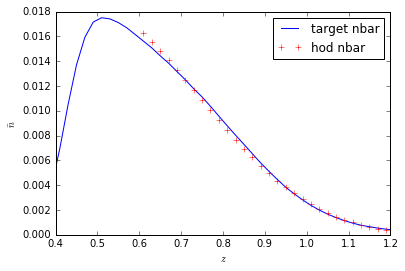

In [4]:
plt.plot(nbar_obs[:,0], nbar_obs[:,1], 'b-', label='target nbar');
plt.plot(fitting.z, fitting.nbar_hod, 'r+', label='hod nbar');

plt.xlim([0.4, 1.2])
plt.xlabel('$z$')
plt.ylabel('$\\bar{n}$')
plt.legend()
plt.show();